error: XDG_RUNTIME_DIR not set in the environment.


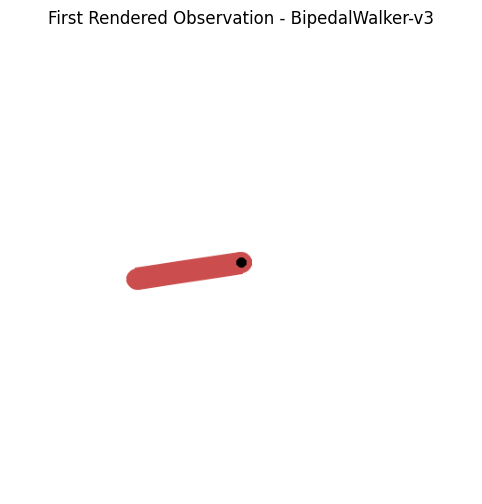

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 14137.18it/s]


In [34]:
import gymnasium as gym
from tqdm import tqdm
import matplotlib.pyplot as plt

# # Set MuJoCo to use EGL (headless) rendering
# import os
# os.environ['MUJOCO_GL'] = 'egl'
# os.environ['PYOPENGL_PLATFORM'] = 'egl'

# Initialise the environment
# env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = gym.make("Pendulum-v1", render_mode="rgb_array")
# env = gym.make("HalfCheetah-v5", render_mode="rgb_array")
# env = gym.make("BipedalWalker-v3", render_mode="rgb_array")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)

# Render and plot the first observation
first_frame = env.render()
plt.figure(figsize=(8, 6))
plt.imshow(first_frame)
plt.title("First Rendered Observation - BipedalWalker-v3")
plt.axis('off')
plt.show()

for t in tqdm(range(1000)):
    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

    # if t % 100 == 0:
    #     first_frame = env.render()
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(first_frame)
    #     plt.title("First Rendered Observation - BipedalWalker-v3")
    #     plt.axis('off')
    #     plt.show()

env.close()

In [35]:
env.action_space, env.observation_space

(Box(-2.0, 2.0, (1,), float32), Box([-1. -1. -8.], [1. 1. 8.], (3,), float32))

In [ ]:
env.action_space.sample()

array([-1.3835869], dtype=float32)

: 

In [2]:
# pip install gymnasium
# pip install swig
# pip install gymnasium[box2d]


# pip install "glfw<2.0.0"
# pip install "Cython<0.30.0,>=0.29.24" fasteners==0.15 lazy_loader tifffile>=2022.8.12
# pip install "gymnasium[mujoco]"

1. Classic Control (all MDPs)
Very lightweight, continuous or discrete state/action:
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Acrobot-v1
Pendulum-v1
2. Box2D Physics
Continuous-state control tasks with simple physics:
LunarLander-v2 (discrete actions)
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
3. MuJoCo Locomotion & Control (from Gymnasium-Robotics / mujoco branch)
High-dimensional continuous control benchmarks (all fully observable):
HalfCheetah-v5
Hopper-v5
Walker2d-v5
Ant-v5
Humanoid-v5
Swimmer-v5
Reacher-v5
InvertedPendulum-v5, InvertedDoublePendulum-v5
4. Atari (ALE interface)
If you wrap with Gymnasium-Atari, these give raw RAM (fully observable) or pixels (partially observable unless you stack frames):
e.g., Breakout-v5, Pong-v5, SpaceInvaders-v5, etc.
5. Toy Text / Tabular
Finite-state MDPs (good for debugging offline RL pipelines):
FrozenLake-v1
Taxi-v3
CliffWalking-v0
Blackjack-v1
Roulette-v1
NChain-v0
GuessingGame-v0

Available keys in the data file:
  obs: shape (500, 4)
  action: shape (500,)
  reward: shape (500,)
  done: shape (500,)

Dataset summary:
Number of timesteps: 500
Observation shape: (500, 4)
Action shape: (500,)
Rewards shape: (500,)
Dones shape: (500,)

First 5 observations:
[[ 0.0273956  -0.00611216  0.03585979  0.0197368 ]
 [ 0.02727336 -0.20172954  0.03625453  0.32351476]
 [ 0.02323877 -0.00714208  0.04272482  0.04248186]
 [ 0.02309593  0.187342    0.04357446 -0.23642075]
 [ 0.02684277 -0.00837454  0.03884605  0.06968222]]

First 5 actions:
[0 1 1 0 1]

First 5 rewards:
[1. 1. 1. 1. 1.]

First 5 dones:
[0 0 0 0 0]

Basic statistics:
Total reward: 500.00
Average reward per step: 1.0000
Number of episodes: 1
Unique actions: [0 1]


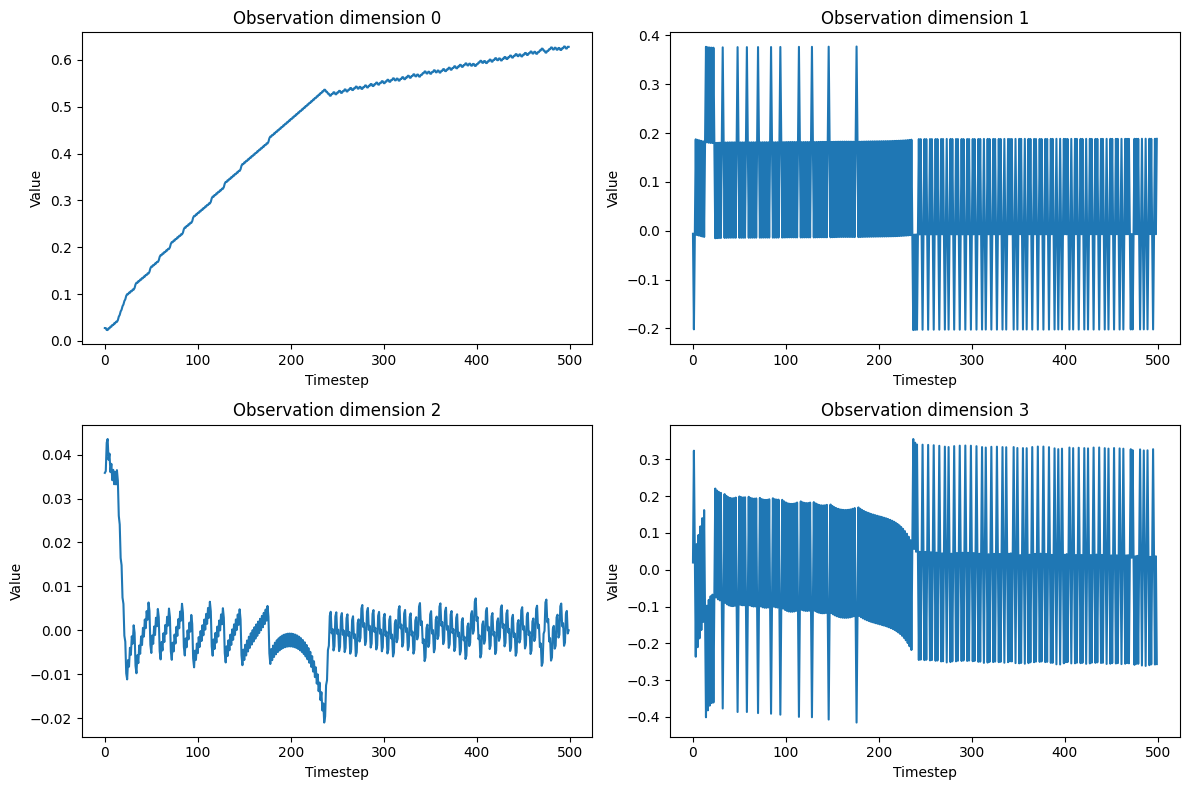

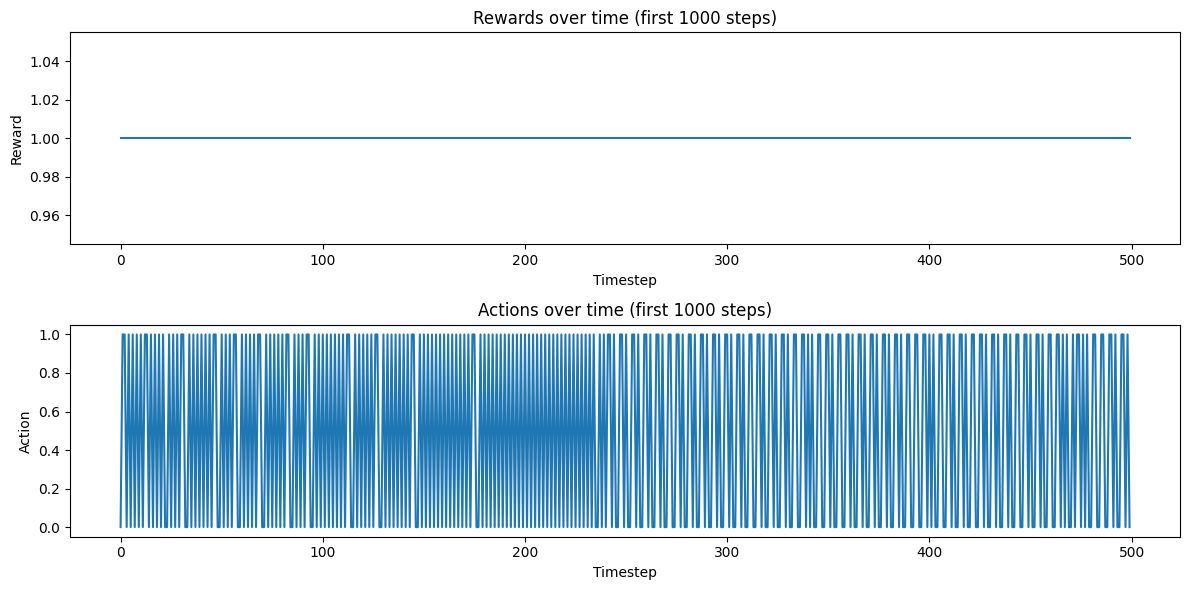

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the CartPole-v1 training data
data_path = "data/MDP/CartPole-v1/train_data_0.npz"
data = np.load(data_path)

# Print available keys in the data file
print("Available keys in the data file:")
for key in data.files:
    print(f"  {key}: shape {data[key].shape}")

# Extract the data arrays
observations = data['obs']
actions = data['action']
rewards = data['reward']
dones = data['done']

print(f"\nDataset summary:")
print(f"Number of timesteps: {len(observations)}")
print(f"Observation shape: {observations.shape}")
print(f"Action shape: {actions.shape}")
print(f"Rewards shape: {rewards.shape}")
print(f"Dones shape: {dones.shape}")

# Show first few samples
print(f"\nFirst 5 observations:")
print(observations[:5])
print(f"\nFirst 5 actions:")
print(actions[:5])
print(f"\nFirst 5 rewards:")
print(rewards[:5])
print(f"\nFirst 5 dones:")
print(dones[:5])

# Basic statistics
print(f"\nBasic statistics:")
print(f"Total reward: {np.sum(rewards):.2f}")
print(f"Average reward per step: {np.mean(rewards):.4f}")
print(f"Number of episodes: {np.sum(dones)}")
print(f"Unique actions: {np.unique(actions)}")

# Plot some data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot observations over time
for i in range(4):
    axes[i//2, i%2].plot(observations[:1000, i])
    axes[i//2, i%2].set_title(f'Observation dimension {i}')
    axes[i//2, i%2].set_xlabel('Timestep')
    axes[i//2, i%2].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Plot rewards and actions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(rewards[:1000])
ax1.set_title('Rewards over time (first 1000 steps)')
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Reward')

ax2.plot(actions[:1000])
ax2.set_title('Actions over time (first 1000 steps)')
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Action')

plt.tight_layout()
plt.show()


Model loaded successfully!

Evaluating model performance...


/home/jovyan/.mlspace/envs/echer-matl/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: -122.12 +/- 76.06

Recording episode for GIF...
Episode completed in 200 steps with total reward: -118.07
Recorded 200 frames


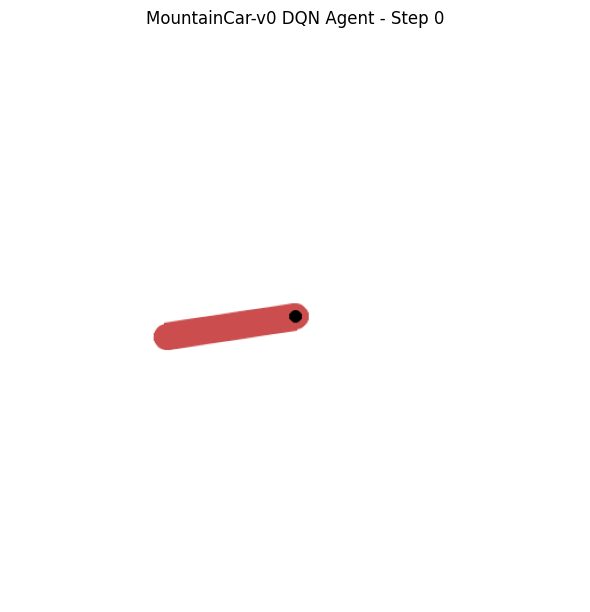

In [23]:
# Load and evaluate the trained DQN model on MountainCar-v0
import gymnasium as gym
from stable_baselines3 import DQN, SAC      
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Load the trained model
model_path = "src/additional/gen_mdp_data/src/additional/gen_mdp_data/models/Pendulum-v1/SAC/final_model.zip"
model = SAC.load(model_path)

print("Model loaded successfully!")

# Create environment for evaluation
eval_env = gym.make("Pendulum-v1", render_mode="rgb_array")

# Evaluate the model
print("\nEvaluating model performance...")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record an episode for GIF creation
print("\nRecording episode for GIF...")
obs, info = eval_env.reset(seed=42)
frames = []
total_reward = 0
step_count = 0

while True:
    # Render current frame
    frame = eval_env.render()
    frames.append(frame)
    
    # Get action from model
    action, _states = model.predict(obs, deterministic=True)
    
    # Take step
    obs, reward, terminated, truncated, info = eval_env.step(action)
    total_reward += reward
    step_count += 1
    
    if terminated or truncated:
        break

print(f"Episode completed in {step_count} steps with total reward: {total_reward:.2f}")
print(f"Recorded {len(frames)} frames")

# Create and display GIF
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

def animate(frame_idx):
    ax.clear()
    ax.imshow(frames[frame_idx])
    ax.set_title(f'MountainCar-v0 DQN Agent - Step {frame_idx}')
    ax.axis('off')

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, repeat=True)

# Display the animation
plt.tight_layout()
HTML(anim.to_jshtml())
